In [1]:
pip install keras-ocr

Note: you may need to restart the kernel to use updated packages.


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


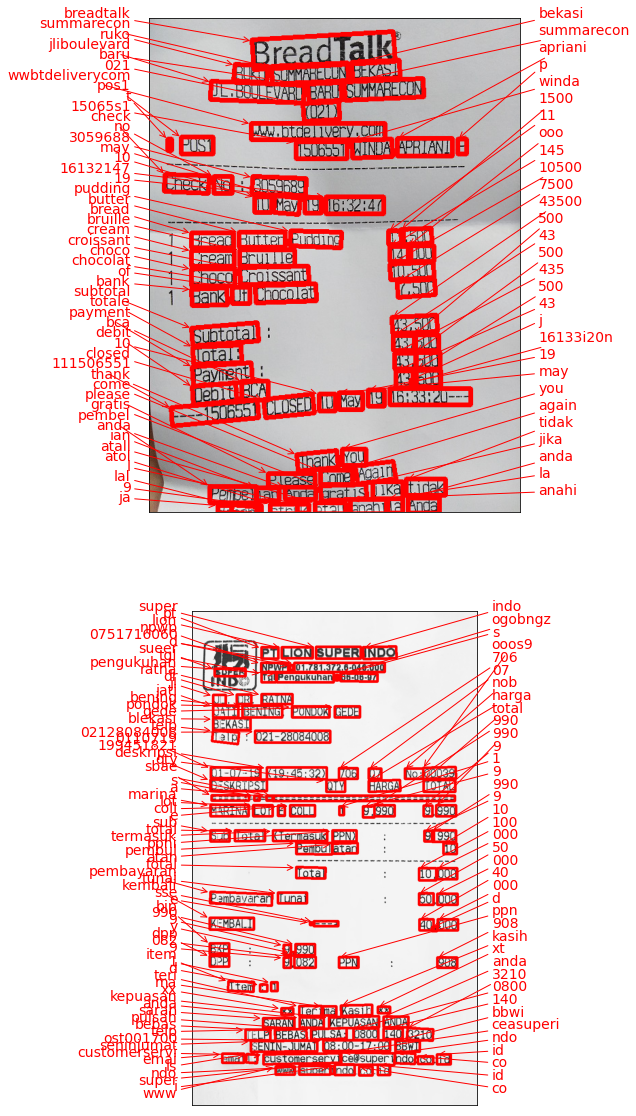

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images
images = [
    keras_ocr.tools.read(url) for url in [
        'https://passingthroughresearcher.files.wordpress.com/2019/06/img_20190511_084303.jpg',
        'https://www.sahabatmarina.com/beautyjourney/themes/front_site/images/struk-offline.jpg'
    ]
]


# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 5.1 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (13.6 MB/s)
debconf: unable to initia

In [ ]:
from google.colab import files

nota = files.upload()

for fn in nota.keys():
  print('User nota file "{name}" with length {length} bytes'.format(
      name=fn, length=len(nota[fn])))

Saving yu.jpeg to yu.jpeg
User nota file "yu.jpeg" with length 51028 bytes


In [ ]:
# Import required packages
import cv2
import pytesseract

# Mention the installed location of Tesseract-OCR in your system
pytesseract.pytesseract.tesseract_cmd = '/usr/local/lib/python3.7/dist-packages'

# Read image from which text needs to be extracted
img = cv2.imread("struk-offline.jpg")

# Preprocessing the image starts

# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
												cv2.CHAIN_APPROX_NONE)

# Creating a copy of image
im2 = img.copy()

# A text file is created and flushed
file = open("recognized.txt", "w+")
file.write("")
file.close()

# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
	x, y, w, h = cv2.boundingRect(cnt)
	
	# Drawing a rectangle on copied image
	rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
	
	# Cropping the text block for giving input to OCR
	cropped = im2[y:y + h, x:x + w]
	
	# Open the file in append mode
	file = open("recognized.txt", "a")
	
	# Apply OCR on the cropped image
	text = pytesseract.image_to_string(cropped)
	
	# Appending the text into file
	file.write(text)
	file.write("\n")
	
	# Close the file
	file.close


error: ignored